In [1]:
import pandas as pd
import MultiContagion as mc
import igraph
import random
import numpy as np
from matplotlib import pylab as plt
import copy
%matplotlib inline

In [2]:
pd.read_stata("CPIS_9countries.dta")

,country,countrycode,counterpart,counterpartcode,year,I_A_D_T_T_BP6_USD,I_A_E_T_T_BP6_USD,I_A_T_T_T_BP6_USD,I_L_D_T_T_BP6_USD,I_L_E_T_T_BP6_USD,I_L_T_T_T_BP6_USD
0,"China, P.R.: Hong Kong",532,"China, P.R.: Mainland",924,2005,6.511577e+03,3.479020e+04,4.130164e+04,0.000000e+00,0.000000e+00,0.000000e+00
1,"China, P.R.: Hong Kong",532,Euro Area,163,2005,4.051570e+04,1.531558e+04,5.583128e+04,2.814339e+03,2.675613e+04,2.957047e+04
2,"China, P.R.: Hong Kong",532,Japan,158,2005,7.554724e+03,9.129184e+03,1.668391e+04,7.579665e+02,8.166155e+03,8.924122e+03
3,"China, P.R.: Hong Kong",532,ROW,999,2005,7.770758e+04,1.055573e+05,1.864325e+05,2.184384e+03,1.389978e+04,1.784431e+04
4,"China, P.R.: Hong Kong",532,Singapore,576,2005,4.828249e+03,2.268817e+03,7.097065e+03,3.348155e+03,1.340846e+04,1.675661e+04
5,"China, P.R.: Hong Kong",532,Switzerland,146,2005,5.297646e+02,7.285392e+02,1.258175e+03,6.937120e+01,1.006881e+03,1.076252e+03
6,"China, P.R.: Hong Kong",532,United Kingdom,112,2005,2.137091e+04,4.814795e+04,6.951886e+04,6.740848e+03,2.225325e+04,2.899409e+04
7,"China, P.R.: Hong Kong",532,United States,111,2005,4.629707e+04,1.186262e+04,5.815956e+04,1.760000e+03,4.446500e+04,4.622500e+04
8,"China, P.R.: Hong Kong",532,"China, P.R.: Mainland",924,2006,6.123866e+03,9.252891e+04,9.865278e+04,0.000000e+00,0.000000e+00,0.000000e+00
9,"China, P.R.: Hong Kong",532,Euro Area,163,2006,4.650807e+04,2.280340e+04,6.931121e+04,3.303124e+03,4.184266e+04,4.514578e+04


In [3]:
pd.read_stata("CDIS_9countries.dta")

,country,countrycode,counterpart,counterpartcode,year,IIWD_BP6_USD,IIWF_BP6_USD,IIW_BP6_USD,IIWE_BP6_USD,IOWD_BP6_USD,IOWF_BP6_USD,IOW_BP6_USD,IOWE_BP6_USD
0,"China, P.R.: Hong Kong",532,Euro Area,163,2008,25.731326,0.000000,2.597742e+01,0.246095,0.000000,0.000000,8.550501e+00,8.550501e+00
1,"China, P.R.: Hong Kong",532,ROW,999,2008,0.000000,0.000000,1.906244e+03,0.000000,0.000000,0.000000,1.819255e+03,0.000000e+00
2,"China, P.R.: Hong Kong",532,"China, P.R.: Mainland",924,2009,2675.649539,-395.332345,3.179082e+05,315232.544646,19462.059184,1111.340339,2.879992e+05,2.685372e+05
3,"China, P.R.: Hong Kong",532,Euro Area,163,2009,10673.328606,-462.381536,5.277532e+04,42101.992135,12248.153219,2295.403043,1.496764e+04,3.403190e+03
4,"China, P.R.: Hong Kong",532,Japan,158,2009,2490.361679,974.921024,2.113648e+04,18646.122107,926.697183,2.965637,1.790342e+03,8.636452e+02
5,"China, P.R.: Hong Kong",532,ROW,999,2009,31178.776352,9760.170202,3.816036e+05,350424.601895,68845.593450,-1365.998324,4.227846e+05,3.539390e+05
6,"China, P.R.: Hong Kong",532,Singapore,576,2009,1538.778931,767.971117,1.276449e+04,11225.710786,1058.474631,16.504416,5.266972e+03,4.208497e+03
7,"China, P.R.: Hong Kong",532,Switzerland,146,2009,87.679711,-50.673715,5.963510e+03,5875.830056,0.000000,0.000000,0.000000e+00,0.000000e+00
8,"China, P.R.: Hong Kong",532,United Kingdom,112,2009,1336.986655,622.654890,1.480420e+04,13467.216814,1113.661273,231.448649,2.250609e+04,2.139243e+04
9,"China, P.R.: Hong Kong",532,United States,111,2009,2167.236155,586.422539,3.706711e+04,34900.006447,1154.664432,121.720070,1.183792e+04,1.068326e+04


* I_A_D_TT - is Assets, Debt Securities
* I_A_E_TT - is Assets, Equity Securities
* I_A_T_TT - is Assets, Total Securities
* I_L_D_TT - is Liabilities, Debt Securities
* I_L_E_TT - is Liabilities, Equity Securities
* I_L_T_TT - is Liabilities, Total Securities
* Asset side is reported by most countries, liability side reporting is voluntary.

## Mapping CPIS and obtaining basic measurements

In [4]:
df_cp = pd.read_stata("CPIS_9countries.dta")

In [5]:
edges_cp_debt, weight_cp_debt = mc.make_edge_list(df_cp["country"], df_cp["counterpart"], df_cp["I_A_D_T_T_BP6_USD"])

In [6]:
G_cp_debt = mc.make_graph_from_edge(edges_cp_debt, weight_cp_debt)

In [7]:
G_cp_debt.strength(weights=G_cp_debt.es["weight"]);

In [8]:
G_cp_debt.vs["name"];

In [9]:
country_name = copy.deepcopy(G_cp_debt.vs["name"])

In [10]:
max_weight = max(G_cp_debt.es["weight"])
E_width_cp = [0.2 + 5*G_cp_debt.es["weight"][i]/max_weight for i in range(len(G_cp_debt.es["weight"]) )]

In [11]:
#random.seed(105)

In [12]:
P_cp_debt = igraph.plot(G_cp_debt, vertex_label = G_cp_debt.vs["name"], bbox = (450, 450), margin = (100, 100, 100, 100), edge_width = E_width_cp )

In [13]:
#P_cp_debt.save("Toy_CPIS_debt.png")

In [14]:
#random.seed(105)

In [15]:
edges_cp_equity, weight_cp_equity = mc.make_edge_list(df_cp["country"], df_cp["counterpart"], df_cp["I_A_E_T_T_BP6_USD"])
G_cp_equity = mc.make_graph_from_edge(edges_cp_equity, weight_cp_equity)
max_weight = max(G_cp_equity.es["weight"])
E_width_cp = [0.2 + 5*G_cp_equity.es["weight"][i]/max_weight for i in range(len(G_cp_equity.es["weight"]) )]

In [16]:
P_cp_equity = igraph.plot(G_cp_equity, vertex_label = G_cp_equity.vs["name"], bbox = (450, 450), margin = (100, 100, 100, 100), edge_width = E_width_cp )

In [17]:
#P_cp_equity.save("Toy_CPIS_equity.png")

In [41]:
str_cp_debt = G_cp_debt.strength(weights=G_cp_debt.es["weight"])
in_str_cp_debt = G_cp_debt.strength(weights=G_cp_debt.es["weight"], mode = "IN")
out_str_cp_debt = G_cp_debt.strength(weights=G_cp_debt.es["weight"], mode = "OUT")

In [42]:
names = list(reversed([x for (y, x) in sorted(zip(in_str_cp_debt, country_name))]))

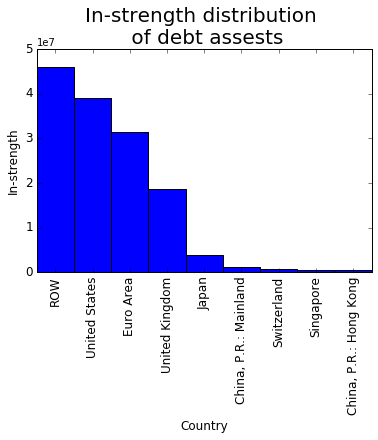

In [43]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
ax1 = plt.gca()
names = list(reversed([x for (y, x) in sorted(zip(in_str_cp_debt, country_name))]))
in_str_cp_debt_ordered = list(reversed(sorted(in_str_cp_debt)))
ax1.bar(np.arange(9), in_str_cp_debt_ordered, 1)
plt.title("In-strength distribution \n of debt assests", fontsize = 20)
plt.xticks(0.5 + np.arange(9), names, rotation='vertical', fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Country", fontsize = 12)
plt.ylabel("In-strength", fontsize = 12)
#plt.savefig("instr_cp_debt.png",bbox_inches='tight')
plt.show()

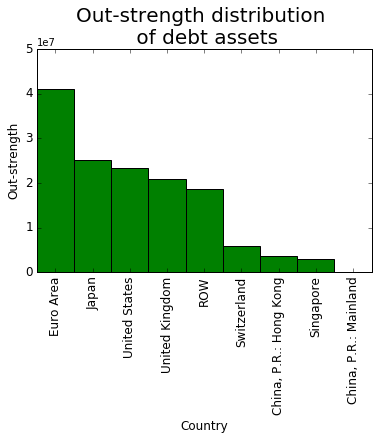

In [56]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
ax1 = plt.gca()
names = list(reversed([x for (y, x) in sorted(zip(out_str_cp_debt, country_name))]))
out_str_cp_debt_ordered = list(reversed(sorted(out_str_cp_debt)))
ax1.bar(np.arange(9), out_str_cp_debt_ordered, 1, color = "green")
plt.title("Out-strength distribution \n of debt assets", fontsize = 20)
plt.xticks(0.5 + np.arange(9),names, rotation='vertical', fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim([0, 5e7])
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Out-strength", fontsize = 12)
#plt.savefig("outstr_cp_debt.png",bbox_inches='tight')
plt.show()

In [8]:
str_cp_equity = G_cp_debt.strength(weights=G_cp_equity.es["weight"])
in_str_cp_equity = G_cp_debt.strength(weights=G_cp_equity.es["weight"], mode = "IN")
out_str_cp_equity = G_cp_debt.strength(weights=G_cp_equity.es["weight"], mode = "OUT")

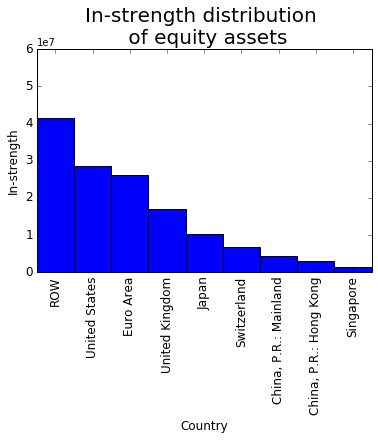

In [57]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
ax1 = plt.gca()
names = list(reversed([x for (y, x) in sorted(zip(in_str_cp_equity, country_name))]))
in_str_cp_equity_ordered = list(reversed(sorted(in_str_cp_equity)))
ax1.bar(np.arange(9), in_str_cp_equity_ordered, 1)
plt.title("In-strength distribution \n of equity assets", fontsize = 20)
plt.xticks(0.5 + np.arange(9), names, rotation='vertical', fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim([0, 6e7])
plt.xlabel("Country", fontsize = 12)
plt.ylabel("In-strength", fontsize = 12)
#plt.savefig("instr_cp_equity.png",bbox_inches='tight')
plt.show()

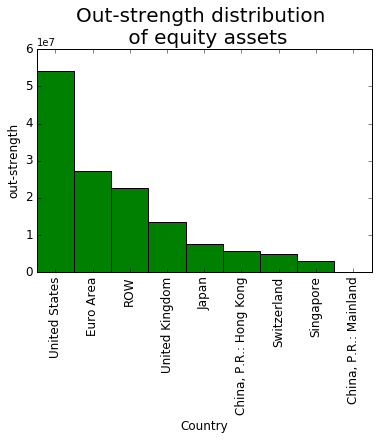

In [12]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
ax1 = plt.gca()
names = list(reversed([x for (y, x) in sorted(zip(out_str_cp_equity, country_name))]))
out_str_cp_equity_ordered = list(reversed(sorted(out_str_cp_equity)))
ax1.bar(np.arange(9), out_str_cp_equity_ordered, 1, color = "green")
plt.title("Out-strength distribution \n of equity assets", fontsize = 20)
plt.xticks(0.5 + np.arange(9), names, rotation='vertical', fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylim([0, 6e7])
plt.xlabel("Country", fontsize = 12)
plt.ylabel("out-strength", fontsize = 12)
#plt.savefig("outstr_cp_equity.png",bbox_inches='tight')
plt.show()

## Contagion on CPIS

In [20]:
mc.SI_contagion_time(G_cp_debt, lam = 0.5, chosen_one=2)

(7.6699999999999999, 2.6535071132371213)

In [21]:
lam_list = [0.25, 0.5, 0.75]
T_iter = 100
n_countries = 9

In [22]:
def make_several_contagion_list(G, contagion_time = mc.SI_contagion_time, parameters = [0.25, 0.50, 0.75], n_countries = 9, T_iter = 100):
    cont_time_mean_list = []
    cont_time_std_list = [] 
    for i in range(len(parameters)):
        cont_time_mean_list.append([])
        cont_time_std_list.append([])
        lam = parameters[i]
        for node in range(n_countries):
            m, s = contagion_time(G_cp_debt, lam = lam, chosen_one= node, iterations = T_iter)
            cont_time_mean_list[i].append(m)
            cont_time_std_list[i].append(s)
    
    return cont_time_mean_list, cont_time_std_list

In [37]:
SI_cont_time_mean_list, SI_cont_time_std_list  = make_several_contagion_list(G_cp_debt)

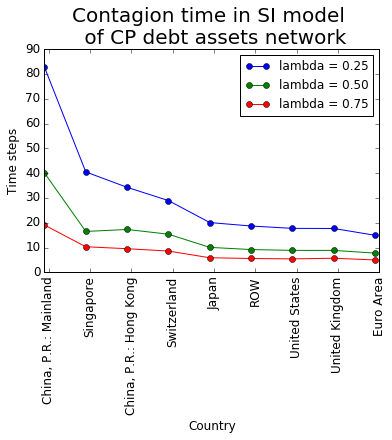

In [38]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
ax1 = plt.gca()
names = list(reversed([x for (y, x) in sorted(zip(SI_cont_time_mean_list[0], country_name))]))
SI_cont_time_mean_list_ordered2 = list(reversed([x for (y, x) in sorted(zip(SI_cont_time_mean_list[0], SI_cont_time_mean_list[1]))]))
SI_cont_time_mean_list_ordered3 = list(reversed([x for (y, x) in sorted(zip(SI_cont_time_mean_list[0], SI_cont_time_mean_list[2]))]))
SI_cont_time_mean_list_ordered1 = list(reversed(sorted(SI_cont_time_mean_list[0])))
ax1.plot(SI_cont_time_mean_list_ordered1, "o-", label = "lambda = 0.25")
ax1.plot(SI_cont_time_mean_list_ordered2, "o-", label = "lambda = 0.50")
ax1.plot(SI_cont_time_mean_list_ordered3, "o-", label = "lambda = 0.75")
plt.title("Contagion time in SI model \n of CP debt assets network", fontsize = 20)
plt.xticks(0.1 + np.arange(9), names, rotation='vertical', fontsize = 12)
plt.yticks(fontsize = 12)
#plt.ylim([0, 6e7])
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Time steps", fontsize = 12)
plt.legend()
#plt.savefig("SIcont-time_cp_debt.png",bbox_inches='tight')
plt.show()

In [39]:
LTM_cont_time_mean_list, LTM_cont_time_std_list  = make_several_contagion_list(G_cp_debt, contagion_time=mc.LTM_contagion_time, parameters= [1, 2, 3] )

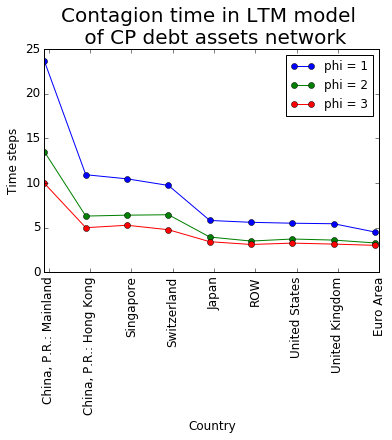

In [40]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
ax1 = plt.gca()
names = list(reversed([x for (y, x) in sorted(zip(LTM_cont_time_mean_list[0], country_name))]))
LTM_cont_time_mean_list_ordered2 = list(reversed([x for (y, x) in sorted(zip(LTM_cont_time_mean_list[0], LTM_cont_time_mean_list[1]))]))
LTM_cont_time_mean_list_ordered3 = list(reversed([x for (y, x) in sorted(zip(LTM_cont_time_mean_list[0], LTM_cont_time_mean_list[2]))]))
LTM_cont_time_mean_list_ordered1 = list(reversed(sorted(LTM_cont_time_mean_list[0])))
ax1.plot(LTM_cont_time_mean_list_ordered1, "o-", label = "phi = 1")
ax1.plot(LTM_cont_time_mean_list_ordered2, "o-", label = "phi = 2")
ax1.plot(LTM_cont_time_mean_list_ordered3, "o-", label = "phi = 3")
plt.title("Contagion time in LTM model \n of CP debt assets network", fontsize = 20)
plt.xticks(0.1 + np.arange(9), names, rotation='vertical', fontsize = 12)
plt.yticks(fontsize = 12)
#plt.ylim([0, 6e7])
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Time steps", fontsize = 12)
plt.legend()
#plt.savefig("LTMcont-time_cp_debt.png",bbox_inches='tight')
plt.show()

### For Equity data

In [ ]:
SI_cont_time_mean_list, SI_cont_time_std_list  = make_several_contagion_list(G_cp_equity)

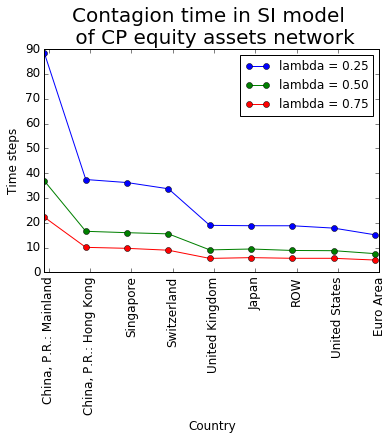

In [36]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
ax1 = plt.gca()
names = list(reversed([x for (y, x) in sorted(zip(SI_cont_time_mean_list[0], country_name))]))
SI_cont_time_mean_list_ordered2 = list(reversed([x for (y, x) in sorted(zip(SI_cont_time_mean_list[0], SI_cont_time_mean_list[1]))]))
SI_cont_time_mean_list_ordered3 = list(reversed([x for (y, x) in sorted(zip(SI_cont_time_mean_list[0], SI_cont_time_mean_list[2]))]))
SI_cont_time_mean_list_ordered1 = list(reversed(sorted(SI_cont_time_mean_list[0])))
ax1.plot(SI_cont_time_mean_list_ordered1, "o-", label = "lambda = 0.25")
ax1.plot(SI_cont_time_mean_list_ordered2, "o-", label = "lambda = 0.50")
ax1.plot(SI_cont_time_mean_list_ordered3, "o-", label = "lambda = 0.75")
plt.title("Contagion time in SI model \n of CP equity assets network", fontsize = 20)
plt.xticks(0.1 + np.arange(9), names, rotation='vertical', fontsize = 12)
plt.yticks(fontsize = 12)
#plt.ylim([0, 6e7])
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Time steps", fontsize = 12)
plt.legend()
plt.savefig("SIcont-time_cp_equity.png",bbox_inches='tight')
plt.show()

In [33]:
LTM_cont_time_mean_list, LTM_cont_time_std_list  = make_several_contagion_list(G_cp_equity, contagion_time=mc.LTM_contagion_time, parameters= [1, 2, 3] )

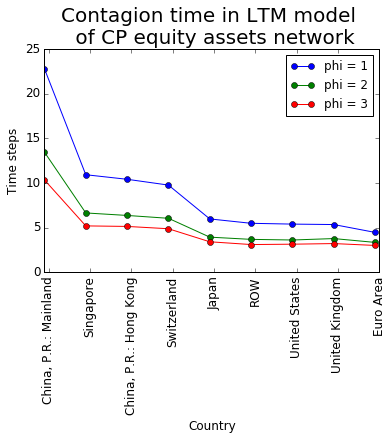

In [35]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
ax1 = plt.gca()
names = list(reversed([x for (y, x) in sorted(zip(LTM_cont_time_mean_list[0], country_name))]))
LTM_cont_time_mean_list_ordered2 = list(reversed([x for (y, x) in sorted(zip(LTM_cont_time_mean_list[0], LTM_cont_time_mean_list[1]))]))
LTM_cont_time_mean_list_ordered3 = list(reversed([x for (y, x) in sorted(zip(LTM_cont_time_mean_list[0], LTM_cont_time_mean_list[2]))]))
LTM_cont_time_mean_list_ordered1 = list(reversed(sorted(LTM_cont_time_mean_list[0])))
ax1.plot(LTM_cont_time_mean_list_ordered1, "o-", label = "phi = 1")
ax1.plot(LTM_cont_time_mean_list_ordered2, "o-", label = "phi = 2")
ax1.plot(LTM_cont_time_mean_list_ordered3, "o-", label = "phi = 3")
plt.title("Contagion time in LTM model \n of CP equity assets network", fontsize = 20)
plt.xticks(0.1 + np.arange(9), names, rotation='vertical', fontsize = 12)
plt.yticks(fontsize = 12)
#plt.ylim([0, 6e7])
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Time steps", fontsize = 12)
plt.legend()
plt.savefig("LTMcont-time_cp_equity.png",bbox_inches='tight')
plt.show()